<a href="https://colab.research.google.com/github/khrisnapriana/Abalone-Sex-Prediction-with-KNN/blob/main/Abalone_Sex_Prediction_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA MINING**

**Nama : I Kadek Krisna Apriana Dwi Guna**

**NIM : 2105551065**


---



**Analisis Dataset Abalone**

1. **Length**: Panjang dari abalone.

2. **Diameter**: Diameter abalone.

3. **Height**: Tinggi daging abalone.

4. **Whole Weight**: Berat total abalone.

5. **Shucked Weight**: Berat daging abalone.

6. **Viscera Weight**: Berat dari isi dalam abalone (hati, ovarium, dan usus).

7. **Shell Weight**: Berat cangkang abalone.

8. **Ring**: Jumlah cincin pada cangkang abalone.

9. **Sex**: Jenis kelamin abalone, "M" untuk Male, "F" untuk Female, dan "I" untuk abalone yang tidak dapat dipastikan jenis kelaminnya (Infant).

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## **Import Dataset**

In [ ]:
data = pd.read_csv('2105551065.csv')

In [ ]:
df = data.copy()
df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,ring,sex
0,0.715,0.550,0.190,2.0045,1.0465,0.4070,0.5075,12,M
1,0.480,0.370,0.120,0.5360,0.2510,0.1140,0.1500,8,I
2,0.690,0.530,0.190,1.5955,0.6780,0.3310,0.4800,10,M
3,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7,I
4,0.490,0.375,0.115,0.5570,0.2275,0.1335,0.1765,8,I
...,...,...,...,...,...,...,...,...,...
995,0.635,0.510,0.210,1.5980,0.6535,0.2835,0.5800,15,NaN
996,0.395,0.290,0.095,0.3000,0.1580,0.0680,0.0780,7,NaN
997,0.565,0.440,0.155,0.8680,0.3480,0.2170,0.2600,11,NaN
998,0.625,0.420,0.165,1.0595,0.3580,0.1650,0.4450,21,NaN


In [ ]:
df.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'ring', 'sex'],
      dtype='object')

In [ ]:
df.shape

(1000, 9)

In [ ]:
#mengecek missing/null value
df.isna().sum()

length             0
diameter           0
height             0
whole_weight       0
shucked_weight     0
viscera_weight     0
shell_weight       0
ring               0
sex               10
dtype: int64

In [ ]:
#membuat dataframe baru tanpa row data null pada kolom 'sex'
df_sex_notnull = df[df['sex'].notnull()]
df_sex_notnull

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,ring,sex
0,0.715,0.550,0.190,2.0045,1.0465,0.4070,0.5075,12,M
1,0.480,0.370,0.120,0.5360,0.2510,0.1140,0.1500,8,I
2,0.690,0.530,0.190,1.5955,0.6780,0.3310,0.4800,10,M
3,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7,I
4,0.490,0.375,0.115,0.5570,0.2275,0.1335,0.1765,8,I
...,...,...,...,...,...,...,...,...,...
985,0.645,0.495,0.190,1.5390,0.6115,0.4080,0.4450,12,M
986,0.460,0.345,0.120,0.4935,0.2435,0.1175,0.1320,8,M
987,0.445,0.330,0.120,0.3470,0.1200,0.0840,0.1050,11,I
988,0.650,0.505,0.170,1.5595,0.6950,0.3515,0.3950,11,M


In [ ]:
#dataframe df_sex_notnull menjadi 990 baris dari sebelumnya 1000 karena terdapat 10 null value di kolom 'sex'
df_sex_notnull.shape

(990, 9)

## **Soal 1 : Visualisasi**

**Membuat visualisasi berdasarkan dataset abalone.**



---



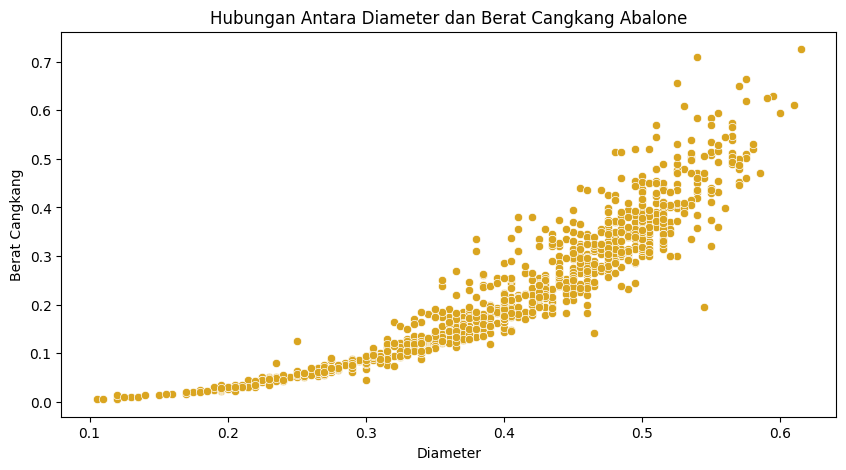

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='diameter', y='shell_weight', data=df_sex_notnull, color='goldenrod')
plt.title('Hubungan Antara Diameter dan Berat Cangkang Abalone')
plt.xlabel('Diameter')
plt.ylabel('Berat Cangkang')
plt.show()

> Grafik diatas menunjukkan korelasi antara diameter (diameter) abalone dengan berat cangkang (shell weight) abalone. Dapat diamati bahwa semakin besar ukuran diameter abalone, maka semakin bertambah pula berat dari cangkang abalone tersebut.



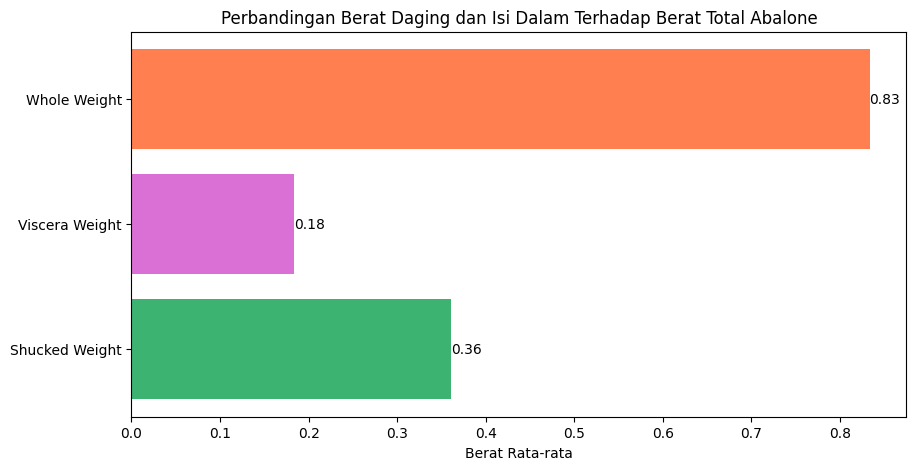

In [ ]:
#menghitung average shucked weight, visceral weight dan whole weight
avg_shucked = df_sex_notnull['shucked_weight'].mean()
avg_viscera = df_sex_notnull['viscera_weight'].mean()
avg_whole = df_sex_notnull['whole_weight'].mean()

weight_cat = ['Shucked Weight', 'Viscera Weight', 'Whole Weight']
avg = [avg_shucked, avg_viscera, avg_whole]

plt.figure(figsize=(10, 5))
bar = plt.barh(weight_cat, avg, color = ['mediumseagreen', 'orchid', 'coral'])
plt.title('Perbandingan Berat Daging dan Isi Dalam Terhadap Berat Total Abalone')
plt.xlabel('Berat Rata-rata')

#menambahkan angka diatas setiap bar
for i, v in enumerate(avg):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')

plt.show()

> Grafik diatas menunjukkan korelasi antara rata-rata berat daging (shucked weight) dan berat isi dalam (viscera weight) abalone terhadap berat total (whole weight) abalone. Terlihat bahwa rata-rata berat daging abalone sebesar 0,36 gram memiliki kontribusi sebanyak 41,9% terhadap berat total abalone. Sedangkan, rata-rata berat isi dalam abalone (hati, usus) sebesar 0,18 gram memiliki kontribusi sebanyak 21% terhadap berat total abalone.

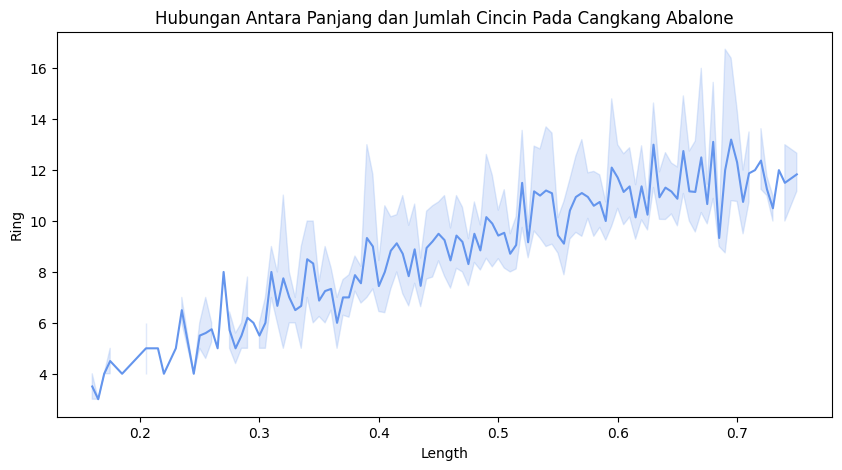

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='length', y='ring', data=df_sex_notnull, color='cornflowerblue')
plt.title('Hubungan Antara Panjang dan Jumlah Cincin Pada Cangkang Abalone')
plt.xlabel('Length')
plt.ylabel('Ring')
plt.show()

> Grafik di atas menunjukkan korelasi antara panjang (length) dan jumlah cincin pada cangkang (ring) abalone. Dapat diamati bahwa seiring bertambahnya panjang abalone, jumlah cincin pada cangkangnya juga meningkat, sebagaimana terlihat dari tren naik pada grafik tersebut.

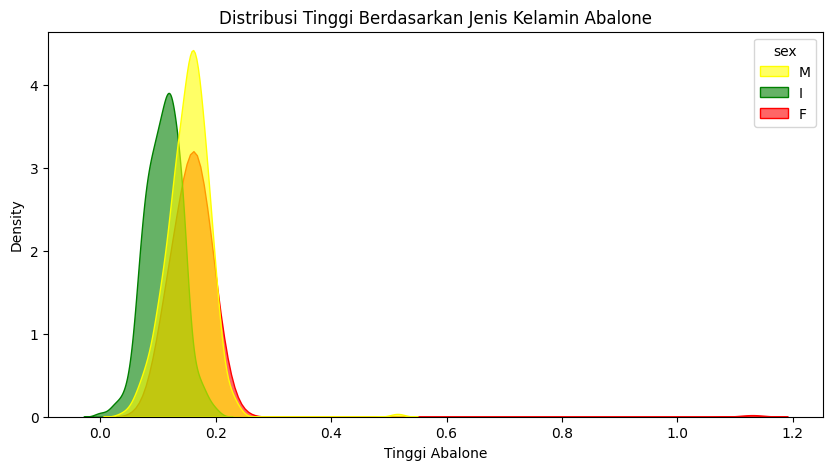

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_sex_notnull, x='height', hue='sex', fill=True, palette=['yellow', 'green', 'red'], alpha=0.6)
plt.title('Distribusi Tinggi Berdasarkan Jenis Kelamin Abalone')
plt.xlabel('Tinggi Abalone')
plt.show()

> Grafik diatas menunjukkan distribusi tinggi abalone berdasarkan jenis kelamin (sex). Dapat diamati bahwa distribusi tinggi abalone jantan
(Male) cenderung memiliki puncak yang lebih tinggi dibandingkan dengan distribusi abalone betina (Female) dan Infant. Namun, rata-rata tinggi abalone jantan (Male) dan betina (Female) hampir sama. Ini bisa mengindikasikan bahwa ada lebih banyak variasi dalam tinggi abalone jantan dibandingkan dengan abalone betina dan Infant.

> Sedangkan abalone Infant memiliki rata-rata tinggi yang lebih kecil dibandingkan yang lainnya. Rata-rata tinggi yang lebih kecil pada abalone Infant mungkin menunjukkan tahap perkembangan yang lebih muda atau ukuran yang lebih kecil pada awal kehidupannya.



## **Soal 2 : Prediksi**

**Membuat model prediksi jenis kelamin abalone berdasarkan dataset abalone.**



---



### **Splitting Dataset**

> Pertama, dataset dipecah menjadi x (variabel independen) dan y (variabel dependen).

> **1. Memisahkan Fitur dan Target:**
* x = df_sex_notnull.drop('sex', axis=1): Kode ini mengambil seluruh kolom dari dataset kecuali kolom 'sex'.
* y = df_sex_notnull['sex']: Kode ini mengambil kolom 'sex' dari dataset.

> **2. Membagi Dataset untuk Training dan Testing:**
* Membagi dataset menjadi dua subset yaitu satu untuk pelatihan model (x_train dan y_train) dan satu lagi untuk pengujian model (x_test dan y_test).
* test_size=0.20 menunjukkan bahwa 20% dari dataset akan digunakan untuk pengujian, sementara 80% akan digunakan untuk pelatihan.
* random_state=42 digunakan untuk menetapkan state random agar hasil pembagian dataset dapat direproduksi dengan cara yang sama jika kode tersebut dijalankan lagi.


In [ ]:
x = df_sex_notnull.drop('sex', axis=1)
y = df_sex_notnull['sex']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print("\nSplit dataset:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)


Split dataset: (792, 8) (198, 8) (792,) (198,)


### **Pembuatan dan Pelatihan Model KNN**

> Membuat dan melatih model KNN (K-Nearest Neighbors) menggunakan subset pelatihan.

> **1. Pembuatan Model KNN:**
* model_knn = KNeighborsClassifier(n_neighbors=3): Kode ini membuat objek model KNN dengan menggunakan KNeighborsClassifier dari library scikit-learn. Parameter 'n_neighbors=3' menentukan jumlah tetangga terdekat yang akan digunakan untuk klasifikasi.

> **2. Pelatihan Model KNN:**
* model_knn.fit(x_train, y_train): Kode ini melatih model KNN menggunakan subset pelatihan (x_train dan y_train). Model akan mempelajari fitur-fitur (x) dan label-label (y) yang diberikan sehingga nantinya akan dapat memprediksi data baru.

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Evaluasi Akurasi Model**
> model_knn.score(x_test, y_test): Kode ini menghitung akurasi model KNN pada subset pengujian (x_test dan y_test) dalam bentuk persentase dari data pengujian yang diprediksi dengan benar oleh model (49%).

In [ ]:
model_knn.score(x_test, y_test)

0.4898989898989899

### **Melakukan Prediksi**

> Setelah mengidentifikasi baris-baris dengan nilai null pada kolom 'sex' dalam dataframe df_sex_isnull, selanjutnya adalah mengisi nilai-nilai ini dengan prediksi yang dihasilkan oleh model KNN.

> **1. Menyiapkan Data:**
* x_pred = df_sex_isnull.drop('sex', axis=1): Kode ini mengambil seluruh kolom dari dataframe df_sex_isnull kecuali kolom 'sex' dan disimpan pada variabel 'x_pred'.

> **2. Melakukan Prediksi:**
* predict = model_knn.predict(x_pred): Kode ini menggunakan model KNN yang telah dilatih sebelumnya untuk memprediksi null value dalam kolom 'sex' berdasarkan fitur-fitur dalam variabel 'x_pred'. Hasil prediksi disimpan dalam variabel 'predict'.

> **3. Mengganti Null Value dengan Hasil Prediksi:**
* df_sex_isnull.loc[:, 'sex'] = predict: Kode ini mengganti null value pada kolom 'sex' dari dataframe df_sex_isnull dengan value hasil prediksi model KNN. Ini dilakukan dengan menggunakan '.loc' untuk memilih kolom 'sex', lalu mengganti nilainya dengan value yang ada pada variabel 'predict'.

>**4. Menampilkan DataFrame Hasil:**
* print(df_sex_isnull): Kode ini mencetak dataframe df_sex_isnull yang sudah diisi dengan value prediksi model KNN.

In [ ]:
#membuat dataframe dengan null value pada kolom 'sex'
df_sex_isnull = df[df['sex'].isnull()]
df_sex_isnull

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,ring,sex
990,0.430,0.310,0.130,0.6485,0.2735,0.1630,0.184,9,NaN
991,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.040,6,NaN
992,0.610,0.450,0.160,1.1360,0.4140,0.3110,0.300,9,NaN
993,0.630,0.500,0.160,1.2200,0.4905,0.3000,0.345,14,NaN
994,0.210,0.150,0.055,0.0455,0.0200,0.0065,0.013,4,NaN
995,0.635,0.510,0.210,1.5980,0.6535,0.2835,0.580,15,NaN
996,0.395,0.290,0.095,0.3000,0.1580,0.0680,0.078,7,NaN
997,0.565,0.440,0.155,0.8680,0.3480,0.2170,0.260,11,NaN
998,0.625,0.420,0.165,1.0595,0.3580,0.1650,0.445,21,NaN
999,0.610,0.465,0.150,0.9605,0.4495,0.1725,0.286,9,NaN


In [ ]:
x_pred = df_sex_isnull.drop('sex', axis=1)

# Melakukan prediksi
predict = model_knn.predict(x_pred)

df_sex_isnull.loc[:, 'sex'] = predict

print(df_sex_isnull)

     length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
990   0.430     0.310   0.130        0.6485          0.2735          0.1630   
991   0.310     0.235   0.090        0.1270          0.0480          0.0310   
992   0.610     0.450   0.160        1.1360          0.4140          0.3110   
993   0.630     0.500   0.160        1.2200          0.4905          0.3000   
994   0.210     0.150   0.055        0.0455          0.0200          0.0065   
995   0.635     0.510   0.210        1.5980          0.6535          0.2835   
996   0.395     0.290   0.095        0.3000          0.1580          0.0680   
997   0.565     0.440   0.155        0.8680          0.3480          0.2170   
998   0.625     0.420   0.165        1.0595          0.3580          0.1650   
999   0.610     0.465   0.150        0.9605          0.4495          0.1725   

     shell_weight  ring sex  
990         0.184     9   I  
991         0.040     6   I  
992         0.300     9   M  
993       

> Hasil prediksi sex pada row 992-1001 adalah I, I, M, M, I, M, I, F, M, dan F.